In [112]:
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [113]:
# Import CSV files 
TB_Rates = Path('Resources/TB_Rates.csv')
HDI = Path('Resources/HDI.csv')
Drug_Resistant_Rates = Path('Resources/Drug_Resistant_Rates.csv')

# Create Data Frames 
tb_rates_df = pd.read_csv(TB_Rates)
hdi_df = pd.read_csv(HDI)
drug_resistant_df = pd.read_csv(Drug_Resistant_Rates)

In [114]:
drug_resistant_df.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,source_rr_new,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,source_rr_ret,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi
0,Afghanistan,AF,AFG,4,EMR,2015,Model,5.1,0.45,19.0,Surveillance,8.6,6.5,11.0,3600,0,10000
1,Afghanistan,AF,AFG,4,EMR,2016,Model,5.1,0.50,20.0,Surveillance,11.0,9.4,14.0,3800,0,11000
2,Afghanistan,AF,AFG,4,EMR,2017,Model,5.2,0.53,19.0,Surveillance,15.0,13.0,16.0,3900,0,11000
3,Afghanistan,AF,AFG,4,EMR,2018,Model,5.2,0.54,20.0,Surveillance,19.0,17.0,20.0,4100,0,12000
4,Afghanistan,AF,AFG,4,EMR,2019,Model,5.3,0.55,20.0,Surveillance,24.0,21.0,26.0,4300,0,12000


In [115]:
#Remove Unused Columns
dr_drop =   ['iso2',
            'iso3','iso_numeric',
            'source_rr_new',
            'source_rr_ret']

drug_resistant_df.drop(dr_drop, inplace=True, axis=1)
drug_resistant_df

,country,g_whoregion,year,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi
0,Afghanistan,EMR,2015,5.1,0.45,19.0,8.6,6.5,11.0,3600,0,10000
1,Afghanistan,EMR,2016,5.1,0.50,20.0,11.0,9.4,14.0,3800,0,11000
2,Afghanistan,EMR,2017,5.2,0.53,19.0,15.0,13.0,16.0,3900,0,11000
3,Afghanistan,EMR,2018,5.2,0.54,20.0,19.0,17.0,20.0,4100,0,12000
4,Afghanistan,EMR,2019,5.3,0.55,20.0,24.0,21.0,26.0,4300,0,12000
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,Zimbabwe,AFR,2017,3.5,3.20,3.8,20.0,16.0,24.0,1500,1000,2000
1487,Zimbabwe,AFR,2018,2.9,2.70,3.1,21.0,18.0,25.0,1200,850,1600
1488,Zimbabwe,AFR,2019,2.4,2.20,2.7,23.0,20.0,27.0,1000,710,1400
1489,Zimbabwe,AFR,2020,2.0,1.70,2.4,25.0,20.0,30.0,830,540,1100


In [116]:
# Rename Columns
dr_rename = {
    'e_rr_pct_new': 'Est. New Cases %',
    'e_rr_pct_new_lo': 'Low Est. New Cases %',
    'e_rr_pct_new_hi': 'High Est. New Cases %',
    'e_rr_pct_ret':'Est. Reinfection %',
    'e_rr_pct_ret_lo':'Low Est. Reinfection %',
    'e_rr_pct_ret_hi':'High Est. Reinfection %',
    'e_inc_rr_num':'Estimated New Case Number',
    'e_inc_rr_num_lo':'Low Estimated New Case Number',
    'e_inc_rr_num_hi':'High Estimated New Case Number',
    'g_whoregion': 'Region'
}

drug_resistant_df.rename(columns=dr_rename, inplace=True)
drug_resistant_df

,country,Region,year,Est. New Cases %,Low Est. New Cases %,High Est. New Cases %,Est. Reinfection %,Low Est. Reinfection %,High Est. Reinfection %,Estimated New Case Number,Low Estimated New Case Number,High Estimated New Case Number
0,Afghanistan,EMR,2015,5.1,0.45,19.0,8.6,6.5,11.0,3600,0,10000
1,Afghanistan,EMR,2016,5.1,0.50,20.0,11.0,9.4,14.0,3800,0,11000
2,Afghanistan,EMR,2017,5.2,0.53,19.0,15.0,13.0,16.0,3900,0,11000
3,Afghanistan,EMR,2018,5.2,0.54,20.0,19.0,17.0,20.0,4100,0,12000
4,Afghanistan,EMR,2019,5.3,0.55,20.0,24.0,21.0,26.0,4300,0,12000
...,...,...,...,...,...,...,...,...,...,...,...,...
1486,Zimbabwe,AFR,2017,3.5,3.20,3.8,20.0,16.0,24.0,1500,1000,2000
1487,Zimbabwe,AFR,2018,2.9,2.70,3.1,21.0,18.0,25.0,1200,850,1600
1488,Zimbabwe,AFR,2019,2.4,2.20,2.7,23.0,20.0,27.0,1000,710,1400
1489,Zimbabwe,AFR,2020,2.0,1.70,2.4,25.0,20.0,30.0,830,540,1100


In [117]:
#find total cases and total reinfection cases; add values to dataframe
drug_resistant_df["Estimated Total Cases"]= drug_resistant_df["Estimated New Case Number"]/((drug_resistant_df["Est. New Cases %"]/100))
drug_resistant_df["Estimated Reinfection Cases"]=drug_resistant_df["Estimated Total Cases"]*((drug_resistant_df["Est. Reinfection %"]/100))
drug_resistant_df

,country,Region,year,Est. New Cases %,Low Est. New Cases %,High Est. New Cases %,Est. Reinfection %,Low Est. Reinfection %,High Est. Reinfection %,Estimated New Case Number,Low Estimated New Case Number,High Estimated New Case Number,Estimated Total Cases,Estimated Reinfection Cases
0,Afghanistan,EMR,2015,5.1,0.45,19.0,8.6,6.5,11.0,3600,0,10000,70588.235294,6070.588235
1,Afghanistan,EMR,2016,5.1,0.50,20.0,11.0,9.4,14.0,3800,0,11000,74509.803922,8196.078431
2,Afghanistan,EMR,2017,5.2,0.53,19.0,15.0,13.0,16.0,3900,0,11000,75000.000000,11250.000000
3,Afghanistan,EMR,2018,5.2,0.54,20.0,19.0,17.0,20.0,4100,0,12000,78846.153846,14980.769231
4,Afghanistan,EMR,2019,5.3,0.55,20.0,24.0,21.0,26.0,4300,0,12000,81132.075472,19471.698113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,Zimbabwe,AFR,2017,3.5,3.20,3.8,20.0,16.0,24.0,1500,1000,2000,42857.142857,8571.428571
1487,Zimbabwe,AFR,2018,2.9,2.70,3.1,21.0,18.0,25.0,1200,850,1600,41379.310345,8689.655172
1488,Zimbabwe,AFR,2019,2.4,2.20,2.7,23.0,20.0,27.0,1000,710,1400,41666.666667,9583.333333
1489,Zimbabwe,AFR,2020,2.0,1.70,2.4,25.0,20.0,30.0,830,540,1100,41500.000000,10375.000000


,Est. New Cases %,Low Est. New Cases %,High Est. New Cases %,Est. Reinfection %,Low Est. Reinfection %,High Est. Reinfection %,Estimated New Case Number,Low Estimated New Case Number,High Estimated New Case Number,Estimated Total Cases,Estimated Reinfection Cases
year,,,,,,,,,,,
2015,799.12,553.28,1353.08,3807.5,2193.14,6974.6,509365,262005,767235,1.556136e+07,2.750259e+06


In [119]:
#create dataframe to show average regional new and reinfection rates by year
region_cases_df = drug_resistant_df.groupby(["Region", "year"]).mean()
region_cases_df

Est. New Cases %  Low Est. New Cases %  High Est. New Cases %  \
Region year                                                                  
AFR    2015          2.414043              1.202766               5.706383   
       2016          2.367021              1.198298               5.536170   
       2017          2.347660              1.194681               5.502128   
       2018          2.328511              1.176383               5.451064   
       2019          2.317447              1.142340               5.484894   
       2020          2.309362              1.104468               5.538085   
       2021          2.318511              1.055745               5.661702   
AMR    2015          2.887556              1.096889               7.563556   
       2016          2.861333              1.111111               7.322444   
       2017          2.853333              1.111556               7.298889   
       2018          2.843778              1.112667               7.300444   
       2019          2.849333              1.094889               7.362222   
       2020          2.864889              1.077111               7.488889   
       2021          2.904889              1.030222               7.670222   
EMR    2015          2.699545              1.518182               4.881818   
       2016          2.600000              1.428182               4.872727   
       2017          2.546364              1.330909               4.795455   
       2018          2.478636              1.242727               4.863636   
       2019          2.430000              1.156818               4.890909   
       2020          2.380909              1.075909               4.922727   
       2021          2.350000              0.989091               5.018182   
EUR    2015          7.370943              6.590566               8.441321   
       2016          7.539057              6.751887               8.670943   
       2017          7.820943              6.980566               8.976038   
       2018          8.049623              7.133019               9.254906   
       2019          8.259245              7.306981               9.668113   
       2020          8.531132              7.479245              10.048113   
       2021          8.778679              7.630755              10.474528   
SEA    2015          3.066364              2.383636               4.009091   
       2016          3.043636              2.483636               3.963636   
       2017          3.030909              2.488182               3.945455   
       2018          3.010000              2.475455               3.927273   
       2019          2.999091              2.443636               3.981818   
       2020          2.996364              2.329091               4.100000   
       2021          2.995455              2.283636               4.145455   
WPR    2015          2.055429              1.099143               4.160857   
       2016          2.083429              1.112286               4.212857   
       2017          2.111429              1.120857               4.285143   
       2018          2.152000              1.119143               4.422286   
       2019          2.208571              1.120286               4.595714   
       2020          2.256857              1.108571               4.799429   
       2021          2.329143              1.099143               5.075143   

             Est. Reinfection %  Low Est. Reinfection %  \
Region year                                               
AFR    2015           17.334043               10.146596   
       2016           16.768085               10.138511   
       2017           16.291489               10.101915   
       2018           15.974468                9.910426   
       2019           15.814894                9.664468   
       2020           15.742553                9.223830   
       2021           15.761702                8.773830   
AMR    2015           15.855556                5.

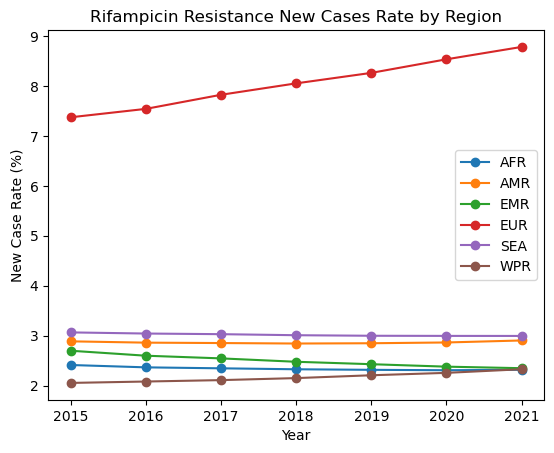

In [121]:
#plot for new cases by region
fig, ax = plt.subplots()

for year, new_df in region_cases_df.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('year').values,
            new_df['Est. New Cases %'],
            label = new_df.index.get_level_values('Region').values[0],
            marker = 'o',
            linestyle = '-')

ax.legend(frameon = True, loc = 7)
plt.xlabel("Year")
plt.ylabel("New Case Rate (%)")
plt.title("Rifampicin Resistance New Cases Rate by Region")
plt.show()


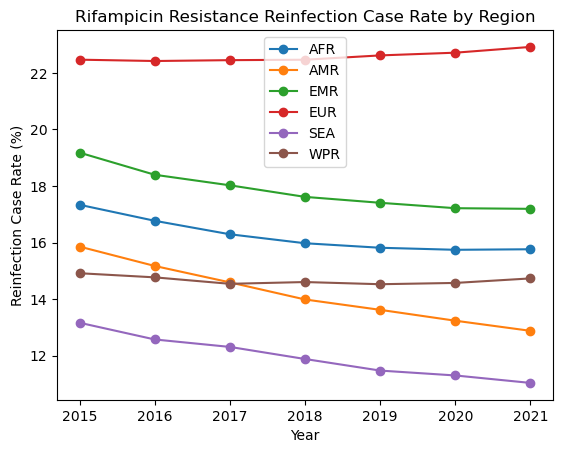

In [134]:
#plot for reinfection cases by region

fig, ax = plt.subplots()

for year, new_df in region_cases_df.groupby(level = 0):
    ax.plot(new_df.index.get_level_values('year').values,
            new_df['Est. Reinfection %'],
            label = new_df.index.get_level_values('Region').values[0],
            marker = 'o',
            linestyle = '-')

ax.legend(frameon = True, loc = 9)
plt.xlabel("Year")
plt.ylabel("Reinfection Case Rate (%)")
plt.title("Rifampicin Resistance Reinfection Case Rate by Region")
plt.show()


In [56]:
#create variables to find global rates of new case aquisition and reinfection over time
reinfection_rates = drug_resistant_df.groupby(["year"]).mean()["Est. Reinfection %"]
new_case_rate = drug_resistant_df.groupby(["year"]).mean()["Est. New Cases %"]



year
2015    509365
2016    489057
2017    468412
2018    451928
2019    434993
2020    420071
2021    429738
Name: Estimated New Case Number, dtype: int64


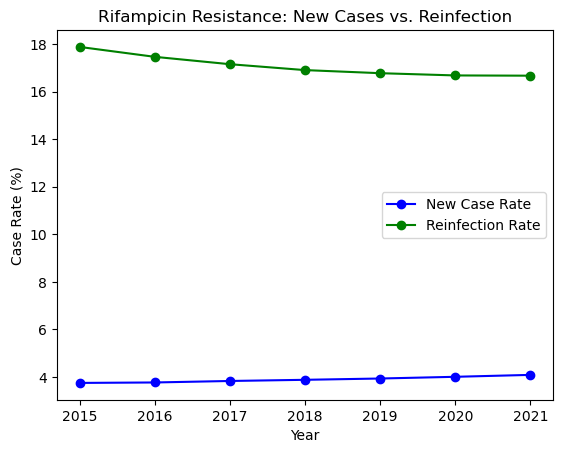

In [135]:
#plot new drug resistant cases and reinfection case rates over time
years = drug_resistant_df["year"].unique()
case_rate = plt.plot(years, new_case_rate, color="blue", label="New Case Rate", marker = "o")
reinfection = plt.plot(years, reinfection_rates, color="green", label="Reinfection Rate", marker = "o")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Case Rate (%)")
plt.title("Rifampicin Resistance: New Cases vs. Reinfection")
plt.show()